In [1]:
import requests
import os 
import cv2
import shutil,sys
import glob
path=r'E:\patent\images'

for filename in os.listdir(path):
    print(os.path.join(path,filename))
    

E:\patent\images\03.jpeg
E:\patent\images\blue-chrome-icon-2.jpg
E:\patent\images\cool-google-chrome-icon-20.jpg


In [8]:
from PIL import Image
import imagehash
hash0 = imagehash.average_hash(Image.open(r'E:\patent\images\03.jpeg')) 
hash1 = imagehash.average_hash(Image.open(r'E:\patent\images\blue-chrome-icon-2.jpg')) 
cutoff = 10  # maximum bits that could be different between the hashes. 
print(hash0)
print(hash1)
if hash0 - hash1 < cutoff:
  print('images are similar')
else:
  print('images are not similar')


ffc7818181c3ffff
ffc381a18189c3ff
images are similar


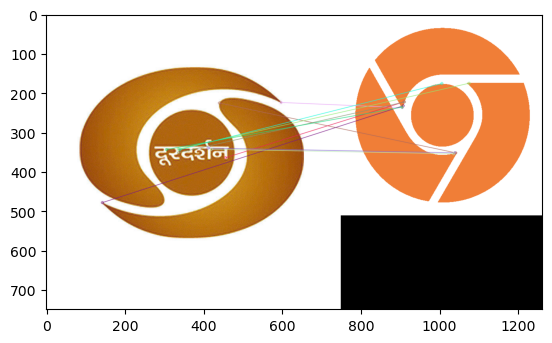

(<matplotlib.image.AxesImage at 0x1dba55dbb80>, None)

In [9]:
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread(r'E:\patent\images\03.jpeg',cv2.COLOR_BGR2GRAY) # queryImage
img2 = cv2.imread(r'E:\patent\images\blue-chrome-icon-2.jpg',cv2.COLOR_BGR2GRAY) # trainImage
# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance) 
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)

plt.imshow(img3),plt.show()


In [5]:
import cv2
img1 = cv2.imread(r'E:\patent\images\cool-google-chrome-icon-20.jpg',0)
img2 = cv2.imread(r'E:\patent\images\blue-chrome-icon-2.jpg',0)
orb = cv2.ORB_create(nfeatures=500)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:100], None)
# cv2.imshow('original image', img1)
# cv2.imshow('test image', img2)
cv2.imshow('Matches', match_img)
cv2.waitKey()


-1

In [10]:
import numpy as np
import cv2
   
      
# Read the query image as query_img
# and train image This query image
# is what you need to find in train image
# Save it in the same directory
# with the name image.jpg  
query_img = cv2.imread(r'E:\patent\images\03.jpeg')
train_img = cv2.imread(r'E:\patent\images\blue-chrome-icon-2.jpg')
   
# Convert it to grayscale
query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
   
# Initialize the ORB detector algorithm
orb = cv2.ORB_create()
   
# Now detect the keypoints and compute
# the descriptors for the query image
# and train image
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None)
  
# Initialize the Matcher for matching
# the keypoints and then match the
# keypoints
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)
   
# draw the matches to the final image
# containing both the images the drawMatches()
# function takes both images and keypoints
# and outputs the matched query image with
# its train image
final_img = cv2.drawMatches(query_img, queryKeypoints, 
train_img, trainKeypoints, matches[:50],None)
   
final_img = cv2.resize(final_img, (1000,650))
  
# Show the final image
cv2.imshow("Matches", final_img)
cv2.waitKey(3000)


-1

In [47]:
img1 =  cv2.imread(r'E:\patent\images\03.jpeg')
img2 = cv2.imread(r'E:\patent\images\blue-chrome-icon-2.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


In [48]:
img1.shape

(750, 750)

In [49]:
img2 = cv2.resize(img2, (750, 750))


In [50]:
img2

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [51]:
def mse(img1, img2):
   h, w = img1.shape
   diff = cv2.subtract(img1, img2)
   err = np.sum(diff**2)
   mse = err/(float(h*w))
   return mse

error = mse(img1, img2)


In [52]:
error

22.05735111111111

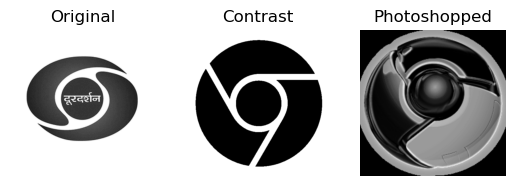

In [1]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)

    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")

    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")

    # show the images
    plt.show()

# load the images -- the original, the original + contrast,
# and the original + photoshop
original = cv2.imread(r'E:\patent\images\03.jpeg')
contrast = cv2.imread(r'E:\patent\images\blue-chrome-icon-2.jpg')
shopped = cv2.imread(r'E:\patent\images\cool-google-chrome-icon-20.jpg')

# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)
# print(original.shape)
# initialize the figure
contrast=cv2.resize(contrast,(750,750))
shopped=cv2.resize(shopped,(750,750))

fig = plt.figure("Images")
images = ("Original", original), ("Contrast", contrast), ("Photoshopped", shopped)

# loop over the images
for (i, (name, image)) in enumerate(images):
    # show the image
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")

# show the figure
plt.show()

# # compare the images
# compare_images(original, original, "Original vs. Original")
# compare_images(original, contrast, "Original vs. Contrast")
# compare_images(original, shopped, "Original vs. Photoshopped")